In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Importing training and testing data

In [2]:
Y_train = pd.read_csv('Y_train.csv',index_col = 0)
X_train = pd.read_csv('X_train.csv',index_col = 0)

In [3]:
Y_test = pd.read_csv('Y_test.csv',index_col = 0)
X_test = pd.read_csv('X_test.csv',index_col = 0)

### Exploring the datasets

In [4]:
X_train.shape

(373028, 324)

In [5]:
Y_train.shape

(373028, 1)

In [6]:
X_test.shape

(93257, 324)

In [7]:
Y_test.shape

(93257, 1)

### selecting features

In [8]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = X_train.loc[:,['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
                                           'home_ownership:RENT_OTHER_ANY_NONE','home_ownership:OWN','home_ownership:MORTGAGE',
                                           'addr_state:NE_IA_NV_ND_HI_ID_FL','addr_state:AL_OK','addr_state:NY',
                                           'addr_state:NJ_LA_MD','addr_state:VA_NC_MO','addr_state:CA',
                                           'addr_state:NM_UT_AR_SD_DE_MI','addr_state:TN_AZ','addr_state:PA','addr_state:KY_IN',
                                           'addr_state:MN_RI_OH_MA','addr_state:GA_OR','addr_state:WI_WA','addr_state:TX',
                                           'addr_state:MT_IL_CT','addr_state:VT_SC_KS_CO','addr_state:AK_NH_WV_MS_WY_DC_ME',
                                           'verification_status:Not Verified','verification_status:Source Verified',
                                           'verification_status:Verified',
                                           'purpose:small-business_educational_moving_renewable-energy_other',
                                           'purpose:house_medical_wedding_vacation','purpose:credit_card',
                                           'purpose:debt_consolidation','purpose:home-improvement_major-purchase_car',
                                           'initial_list_status:f','initial_list_status:w',
                                           'term_int:36','term_int:60',
                                           'emp_length_int:0','emp_length_int:1','emp_length_int:2_3_4',
                                           'emp_length_int:5_6','emp_length_int:7_8','emp_length_int:9',
                                           'emp_length_int:10',
                                           'months_since_issue_date:<38','months_since_issue_date:38-39',
                                           'months_since_issue_date:40-41','months_since_issue_date:42-43',
                                           'months_since_issue_date:44-48','months_since_issue_date:49-52',
                                           'months_since_issue_date:53-59','months_since_issue_date:60-64',
                                           'months_since_issue_date:65-84','months_since_issue_date:>84',
                                           'int_rate:<=9.548','int_rate:9.548-12.025','int_rate:12.025-15.74',
                                           'int_rate:15.74-20.281','int_rate:>20.281',
                                           'months_since_earliest_cr_line:<142','months_since_earliest_cr_line:142-230',
                                           'months_since_earliest_cr_line:231-266','months_since_earliest_cr_line:267-354',
                                           'months_since_earliest_cr_line:355-549','months_since_earliest_cr_line:>=550', 
                                           'delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>3',
                                           'inq_last_6mths:0','inq_last_6mths:1','inq_last_6mths:2','inq_last_6mths:3-5',
                                           'inq_last_6mths:>=6',
                                           'open_acc:0','open_acc:1-3','open_acc:4-12','open_acc:13-17','open_acc:18-22',
                                           'open_acc:23-25','open_acc:26-30','open_acc:>=31',
                                           'pub_rec:0','pub_rec:1-2','pub_rec:3-5','pub_rec:>=6',
                                           'total_acc:<=15','total_acc:16-28','total_acc:29-49','total_acc:>=50',
                                           'acc_now_delinq:0','acc_now_delinq:>=1',
                                           'annual_inc:<=20k','annual_inc:20k-30k','annual_inc:30k-40k','annual_inc:40k-50k',
                                           'annual_inc:50k-60k','annual_inc:60k-70k','annual_inc:70k-80k','annual_inc:80k-90k',
                                           'annual_inc:90k-100k','annual_inc:100k-120k','annual_inc:120k-140k','annual_inc:>=140k',
                                           'mths_since_last_delinq:Missing','mths_since_last_delinq:0-3','mths_since_last_delinq:4-30',
                                           'mths_since_last_delinq:31-56','mths_since_last_delinq:>56',
                                           'dti:<=1.4','dti:1.4-3.5','dti:3.5-7.7','dti:7.7-10.5','dti:10.5-16.1','dti:16.1-20.3',
                                           'dti:20.3-21.7','dti:21.7-22.4','dti:22.4-35','dti:>35',
                                           'mths_since_last_record:Missing','mths_since_last_record:0-2','mths_since_last_record:3-20',
                                           'mths_since_last_record:21-31','mths_since_last_record:32-80','mths_since_last_record:81-86',
                                           'mths_since_last_record:>86']]

In [9]:
inputs_train_with_ref_cat.shape

(373028, 127)

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_ANY_NONE',
'addr_state:NE_IA_NV_ND_HI_ID_FL',
'verification_status:Verified',
'purpose:small-business_educational_moving_renewable-energy_other',
'initial_list_status:f',
'term_int:60',
'emp_length_int:0',
'months_since_issue_date:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<142',
'delinq_2yrs:>3',
'inq_last_6mths:>=6',
'open_acc:0',
'pub_rec:0',
'total_acc:<=15',
'acc_now_delinq:0',
'annual_inc:<=20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 

### PD Model Estimation
### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()
reg.fit(inputs_train, Y_train)

LogisticRegression()

In [14]:
reg.intercept_

array([-1.20958057])

In [15]:
(reg.coef_)

array([[ 1.08149567,  0.92000029,  0.72632092,  0.5401719 ,  0.36587659,
         0.23069687,  0.09432504,  0.12370321,  0.07755652,  0.07204459,
         0.0540339 ,  0.09796953,  0.09755057,  0.12555945,  0.08848719,
         0.16478525,  0.11106767,  0.15740262,  0.18115541,  0.2699189 ,
         0.24999734,  0.30083768,  0.36589391,  0.51343116,  0.09238632,
        -0.01004576,  0.20760861,  0.24226701,  0.12427043,  0.18449394,
         0.03110306,  0.06836011,  0.11560594,  0.12458476,  0.08568614,
         0.08313265,  0.03227512,  0.12832526,  1.09970295,  0.88635897,
         0.79201317,  0.6765062 ,  0.54851306,  0.42060205,  0.21611001,
         0.05162703, -0.08522265,  1.01418581,  0.58450606,  0.33356716,
         0.13268655,  0.04242547,  0.07103415,  0.12167695,  0.14345367,
        -0.07128535,  0.04361524, -0.00247095,  0.68354551,  0.56719871,
         0.46952296,  0.35331266, -0.14311987, -0.1505498 , -0.14655208,
        -0.14326404, -0.13043081, -0.17894882, -0.0

In [16]:
features = inputs_train.columns.values
#creating a summary dataframe
summary = pd.DataFrame(columns = ['Features'],data = features)
summary['Coefficients'] = np.transpose(reg.coef_)

In [19]:
#adding the intercept at the top of the summary dataframe
summary.index = summary.index + 1
summary.loc[0] = ['Intercept',reg.intercept_[0]]
summary = summary.sort_index()
summary

,Features,Coefficients
0,Intercept,-1.209581
1,grade:A,1.081496
2,grade:B,0.920000
3,grade:C,0.726321
4,grade:D,0.540172
...,...,...
102,mths_since_last_record:3-20,0.303614
103,mths_since_last_record:21-31,0.217681
104,mths_since_last_record:32-80,0.336001
105,mths_since_last_record:81-86,-0.003678


### Building a Logistic Regression model with p-values

In [20]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [22]:
reg.fit(inputs_train, Y_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

In [24]:
#creating a summary dataframe
summary = pd.DataFrame(columns = ['Features'],data = features)
summary['Coefficients'] = np.transpose(reg.coef_)

#adding the intercept at the top of the summary dataframe
summary.index = summary.index + 1
summary.loc[0] = ['Intercept',reg.intercept_[0]]
summary = summary.sort_index()
summary

,Features,Coefficients
0,Intercept,-1.209581
1,grade:A,1.081496
2,grade:B,0.920000
3,grade:C,0.726321
4,grade:D,0.540172
...,...,...
102,mths_since_last_record:3-20,0.303614
103,mths_since_last_record:21-31,0.217681
104,mths_since_last_record:32-80,0.336001
105,mths_since_last_record:81-86,-0.003678


In [25]:
p_values = [np.nan] + reg.p_values

In [26]:
summary['P_values'] = p_values
summary

,Features,Coefficients,P_values
0,Intercept,-1.209581,NaN
1,grade:A,1.081496,3.854001e-31
2,grade:B,0.920000,9.586549e-52
3,grade:C,0.726321,3.602690e-38
4,grade:D,0.540172,3.543447e-24
...,...,...,...
102,mths_since_last_record:3-20,0.303614,5.756469e-01
103,mths_since_last_record:21-31,0.217681,6.870499e-01
104,mths_since_last_record:32-80,0.336001,5.299547e-01
105,mths_since_last_record:81-86,-0.003678,9.945452e-01


In [27]:
#removing all dummy variables of an original independent variable if the coefficients for all of them are insignificant
#updating the ref_categories with additional columns that we want to remove
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_ANY_NONE',
'addr_state:NE_IA_NV_ND_HI_ID_FL',
'verification_status:Verified',
'purpose:small-business_educational_moving_renewable-energy_other',
'initial_list_status:f',
'term_int:60',
'emp_length_int:0',
'months_since_issue_date:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<142',
'delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>3',
'inq_last_6mths:>=6',
'open_acc:0','open_acc:1-3','open_acc:4-12',
'open_acc:13-17','open_acc:18-22','open_acc:23-25',
'open_acc:26-30','open_acc:>=31',
'pub_rec:0','pub_rec:1-2','pub_rec:3-5','pub_rec:>=6',
'total_acc:<=15','total_acc:16-28','total_acc:29-49','total_acc:>=50',
'acc_now_delinq:0',
'annual_inc:<=20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [28]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = X_train.loc[:,['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
                                           'home_ownership:RENT_OTHER_ANY_NONE','home_ownership:OWN','home_ownership:MORTGAGE',
                                           'addr_state:NE_IA_NV_ND_HI_ID_FL','addr_state:AL_OK','addr_state:NY',
                                           'addr_state:NJ_LA_MD','addr_state:VA_NC_MO','addr_state:CA',
                                           'addr_state:NM_UT_AR_SD_DE_MI','addr_state:TN_AZ','addr_state:PA','addr_state:KY_IN',
                                           'addr_state:MN_RI_OH_MA','addr_state:GA_OR','addr_state:WI_WA','addr_state:TX',
                                           'addr_state:MT_IL_CT','addr_state:VT_SC_KS_CO','addr_state:AK_NH_WV_MS_WY_DC_ME',
                                           'verification_status:Not Verified','verification_status:Source Verified',
                                           'verification_status:Verified',
                                           'purpose:small-business_educational_moving_renewable-energy_other',
                                           'purpose:house_medical_wedding_vacation','purpose:credit_card',
                                           'purpose:debt_consolidation','purpose:home-improvement_major-purchase_car',
                                           'initial_list_status:f','initial_list_status:w',
                                           'term_int:36','term_int:60',
                                           'emp_length_int:0','emp_length_int:1','emp_length_int:2_3_4',
                                           'emp_length_int:5_6','emp_length_int:7_8','emp_length_int:9',
                                           'emp_length_int:10',
                                           'months_since_issue_date:<38','months_since_issue_date:38-39',
                                           'months_since_issue_date:40-41','months_since_issue_date:42-43',
                                           'months_since_issue_date:44-48','months_since_issue_date:49-52',
                                           'months_since_issue_date:53-59','months_since_issue_date:60-64',
                                           'months_since_issue_date:65-84','months_since_issue_date:>84',
                                           'int_rate:<=9.548','int_rate:9.548-12.025','int_rate:12.025-15.74',
                                           'int_rate:15.74-20.281','int_rate:>20.281',
                                           'months_since_earliest_cr_line:<142','months_since_earliest_cr_line:142-230',
                                           'months_since_earliest_cr_line:231-266','months_since_earliest_cr_line:267-354',
                                           'months_since_earliest_cr_line:355-549','months_since_earliest_cr_line:>=550', 
                                           'delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>3',
                                           'inq_last_6mths:0','inq_last_6mths:1','inq_last_6mths:2','inq_last_6mths:3-5',
                                           'inq_last_6mths:>=6',
                                           'open_acc:0','open_acc:1-3','open_acc:4-12','open_acc:13-17','open_acc:18-22',
                                           'open_acc:23-25','open_acc:26-30','open_acc:>=31',
                                           'pub_rec:0','pub_rec:1-2','pub_rec:3-5','pub_rec:>=6',
                                           'total_acc:<=15','total_acc:16-28','total_acc:29-49','total_acc:>=50',
                                           'acc_now_delinq:0','acc_now_delinq:>=1',
                                           'annual_inc:<=20k','annual_inc:20k-30k','annual_inc:30k-40k','annual_inc:40k-50k',
                                           'annual_inc:50k-60k','annual_inc:60k-70k','annual_inc:70k-80k','annual_inc:80k-90k',
                                           'annual_inc:90k-100k','annual_inc:100k-120k','annual_inc:120k-140k','annual_inc:>=140k',
                                           'mths_since_last_delinq:Missing','mths_since_last_delinq:0-3','mths_since_last_delinq:4-30',
                                           'mths_since_last_delinq:31-56','mths_since_last_delinq:>56',
                                           'dti:<=1.4','dti:1.4-3.5','dti:3.5-7.7','dti:7.7-10.5','dti:10.5-16.1','dti:16.1-20.3',
                                           'dti:20.3-21.7','dti:21.7-22.4','dti:22.4-35','dti:>35',
                                           'mths_since_last_record:Missing','mths_since_last_record:0-2','mths_since_last_record:3-20',
                                           'mths_since_last_record:21-31','mths_since_last_record:32-80','mths_since_last_record:81-86',
                                           'mths_since_last_record:>86']]

In [29]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_OK,addr_state:NY,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
65660,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
385629,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
111732,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
63706,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
332036,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#creating a new model
model2 = LogisticRegression_with_p_values()
model2.fit(inputs_train,Y_train)

In [31]:
#collectin features
features = inputs_train.columns.values

In [32]:
#creating a summary dataframe
summary = pd.DataFrame(columns = ['Features'],data = features)
summary['Coefficients'] = np.transpose(model2.coef_)

#adding the intercept at the top of the summary dataframe
summary.index = summary.index + 1
summary.loc[0] = ['Intercept',model2.intercept_[0]]
summary = summary.sort_index()
summary

,Features,Coefficients
0,Intercept,-1.375828
1,grade:A,1.072689
2,grade:B,0.906987
3,grade:C,0.715753
4,grade:D,0.530539
...,...,...
87,mths_since_last_record:3-20,0.505175
88,mths_since_last_record:21-31,0.412069
89,mths_since_last_record:32-80,0.528174
90,mths_since_last_record:81-86,0.197023


In [33]:
#adding p_values
p_values = [np.nan] + model2.p_values
summary['P_values'] = p_values
summary

,Features,Coefficients,P_values
0,Intercept,-1.375828,NaN
1,grade:A,1.072689,6.843649e-31
2,grade:B,0.906987,6.894186e-51
3,grade:C,0.715753,9.089304e-38
4,grade:D,0.530539,5.113722e-24
...,...,...,...
87,mths_since_last_record:3-20,0.505175,2.938016e-05
88,mths_since_last_record:21-31,0.412069,2.203980e-04
89,mths_since_last_record:32-80,0.528174,1.011802e-10
90,mths_since_last_record:81-86,0.197023,4.610966e-02


In [35]:
import pickle
pickle.dump(model2, open('pd_model.sav', 'wb'))
#saving our model to a .sav file

## PD Model Validation(Test)
### Out-of-sample Validation(test)

In [36]:
#selecting the same set of columns from the test dataframe in order to estimate the target variables
inputs_test = X_test[inputs_train.columns]
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_OK,addr_state:NY,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
250063,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
233680,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
416548,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30906,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
408889,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
#predicting the target class for each test observation
y_pred = model2.model.predict(inputs_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
#predicting the probabilities of default/non-default instead of the target class
y_pred_prob = model2.model.predict_proba(inputs_test)
y_pred_prob

array([[0.05962886, 0.94037114],
       [0.02077642, 0.97922358],
       [0.08083507, 0.91916493],
       ...,
       [0.12044376, 0.87955624],
       [0.10916857, 0.89083143],
       [0.17206017, 0.82793983]])

In [39]:
#keeping only the probabilities of non-default
y_pred_prob = y_pred_prob[:,1]

In [40]:
#creating a df containing actual target class, predicted target class and probability of non-default
targets = Y_test
targets['predicted_class'] = y_pred
targets['prob_of_non_default'] = y_pred_prob

In [41]:
#targets.index
targets.head()

,good_bad,predicted_class,prob_of_non_default
250063,1,1,0.940371
233680,1,1,0.979224
416548,1,1,0.919165
30906,1,1,0.910205
408889,1,1,0.906139


### Accuracy and area under curve

In [42]:
#creating a confusion matrix
pd.crosstab(targets.good_bad,targets.predicted_class, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,5,10165
1,9,83078


In [43]:
#checking accuracy
print(metrics.accuracy_score(targets.good_bad, targets.predicted_class))

0.890903631898946


In [45]:
#our model does not predict actual defaulters at all
# we need to change the threshold
tr = 0.7
targets['y_hat_threshold'] = np.where(targets.prob_of_non_default>=tr,1,0)

#creating a confusion matrix
pd.crosstab(targets.good_bad,targets.y_hat_threshold, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,574,9596
1,1296,81791


In [46]:
#checking accuracy
print(metrics.accuracy_score(targets.good_bad, targets.y_hat_threshold))

0.883204477948036


In [47]:
#still not good
tr = 0.8
targets['y_hat_threshold'] = np.where(targets.prob_of_non_default>=tr,1,0)

#creating a confusion matrix
pd.crosstab(targets.good_bad,targets.y_hat_threshold, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2621,7549
1,7959,75128


In [48]:
#checking accuracy
print(metrics.accuracy_score(targets.good_bad, targets.y_hat_threshold))

0.8337068531048608


In [49]:
#better but still not good
tr = 0.9
targets['y_hat_threshold'] = np.where(targets.prob_of_non_default>=tr,1,0)

#creating a confusion matrix
pd.crosstab(targets.good_bad,targets.y_hat_threshold, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7214,2956
1,35606,47481


In [50]:
#checking accuracy
print(metrics.accuracy_score(targets.good_bad, targets.y_hat_threshold))

0.5864975283356745


In [51]:
# now we are not predicting accurately
#this way, we predict bad loans more accurately, but we also classify large portion of good loans as bad.
#Hence, though we will drastically reduce no. of bad loans given, it will come at a cost of a heavily reduced no. of total loans
#we need to find a balance
tr = 0.85
targets['y_hat_threshold'] = np.where(targets.prob_of_non_default>=tr,1,0)

#creating a confusion matrix
print(pd.crosstab(targets.good_bad,targets.y_hat_threshold, rownames = ['Actual'], colnames = ['Predicted']))
#checking accuracy
print('Accuracy : ',metrics.accuracy_score(targets.good_bad, targets.y_hat_threshold))

Predicted      0      1
Actual                 
0           4665   5505
1          17550  65537
Accuracy :  0.7527799521751718


In [54]:
tr = 0.88
targets['y_hat_threshold'] = np.where(targets.prob_of_non_default>=tr,1,0)

#creating a confusion matrix
print(pd.crosstab(targets.good_bad,targets.y_hat_threshold, rownames = ['Actual'], colnames = ['Predicted'],normalize = 'index'))
#checking accuracy
print('Accuracy : ',metrics.accuracy_score(targets.good_bad, targets.y_hat_threshold))

Predicted         0         1
Actual                       
0          0.607768  0.392232
1          0.327271  0.672729
Accuracy :  0.6656444020288022


In [55]:
#checking roc curves
fpr, tpr, thresholds = metrics.roc_curve(targets.good_bad, targets.prob_of_non_default)

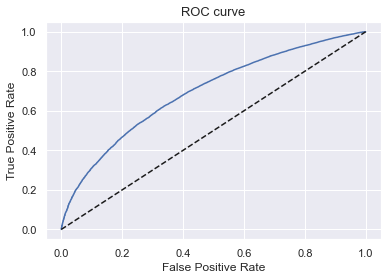

In [56]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [57]:
#checking area under the roc curvre
roc_auc = metrics.roc_auc_score(targets.good_bad, targets.prob_of_non_default)
roc_auc

0.6954297173832278

### GINI and Kolmogorov Smirnov coefficients

In [63]:
#sort the targets dataframe by probabilities of non-default
tr = 0.7
targets['predicted_class'] = np.where(targets.prob_of_non_default>=tr,1,0)
targets = targets.sort_values('prob_of_non_default')
#targets.reset_index(inplace = True)
#targets.drop(columns = 'y_hat_threshold',inplace = True)
targets.head()

,level_0,index,good_bad,predicted_class,prob_of_non_default
0,0,42341,1,0,0.339778
1,1,41887,0,0,0.416559
2,2,42014,0,0,0.429092
3,3,41033,1,0,0.456423
4,4,8184,0,0,0.463899


In [64]:
#finding cumulative number of total, good and bad borrowers
targets['Cumulative_all'] = targets.index+1
targets['Cumulative_good'] = targets.good_bad.cumsum()
targets['Cumulative_bad'] = targets.Cumulative_all - targets.Cumulative_good
targets.head()

,level_0,index,good_bad,predicted_class,prob_of_non_default,Cumulative_all,Cumulative_good,Cumulative_bad
0,0,42341,1,0,0.339778,1,1,0
1,1,41887,0,0,0.416559,2,1,1
2,2,42014,0,0,0.429092,3,1,2
3,3,41033,1,0,0.456423,4,2,2
4,4,8184,0,0,0.463899,5,2,3


In [65]:
#finding cumulative % of total, good and bad borrowers
targets['cumulative_%_all'] = targets.Cumulative_all / targets.Cumulative_all.max()
targets['cumulative_%_good'] = targets.Cumulative_good / targets.Cumulative_good.max()
targets['cumulative_%_bad'] = targets.Cumulative_bad / targets.Cumulative_bad.max()
targets.head()

,level_0,index,good_bad,predicted_class,prob_of_non_default,Cumulative_all,Cumulative_good,Cumulative_bad,cumulative_%_all,cumulative_%_good,cumulative_%_bad
0,0,42341,1,0,0.339778,1,1,0,0.000011,0.000012,0.000000
1,1,41887,0,0,0.416559,2,1,1,0.000021,0.000012,0.000098
2,2,42014,0,0,0.429092,3,1,2,0.000032,0.000012,0.000197
3,3,41033,1,0,0.456423,4,2,2,0.000043,0.000024,0.000197
4,4,8184,0,0,0.463899,5,2,3,0.000054,0.000024,0.000295


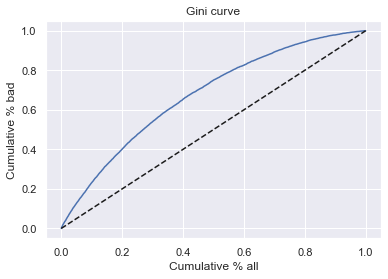

Gini coefficient -  0.39085943476645557


In [66]:
#plotting gini and finding gini coeff
plt.plot(targets['cumulative_%_all'],targets['cumulative_%_bad'])
plt.plot(targets['cumulative_%_all'],targets['cumulative_%_all'],'--k')
plt.xlabel('Cumulative % all')
plt.ylabel('Cumulative % bad')
plt.title('Gini curve')
plt.show()

gini = 2*roc_auc - 1
print('Gini coefficient - ',gini)

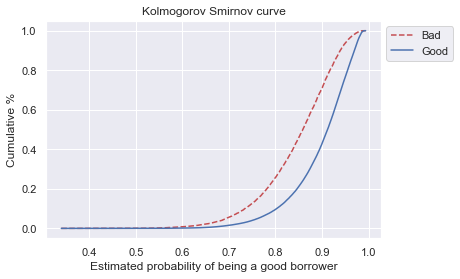

KS coefficient is -  0.2864146404973692


In [67]:
#plotting and finding kolmogorov smirnov coefficient
plt.plot(targets['prob_of_non_default'],targets['cumulative_%_bad'],'--r',label = 'Bad')
plt.plot(targets['prob_of_non_default'],targets['cumulative_%_good'],'-b', label = 'Good')
plt.xlabel('Estimated probability of being a good borrower')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov Smirnov curve')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

#calculating the coefficient as max difference between the cumulative % bad and cumulative % good
ks_coeff = max(targets['cumulative_%_bad']-targets['cumulative_%_good'])
print('KS coefficient is - ',ks_coeff)

### Creating a scorecard from PD model coefficients

In [81]:
pd.options.display.max_rows = None

In [82]:
#creating a dataframe with reference categories, 0 as their coefficients and np.nan as their p_values
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_ANY_NONE',
'addr_state:NE_IA_NV_ND_HI_ID_FL',
'verification_status:Verified',
'purpose:small-business_educational_moving_renewable-energy_other',
'initial_list_status:f',
'term_int:60',
'emp_length_int:0',
'months_since_issue_date:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<142',
'inq_last_6mths:>=6',
'acc_now_delinq:0',
'annual_inc:<=20k',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

df_ref = pd.DataFrame(data = ref_categories, columns = ['Features'])
df_ref['Coefficients'] = 0
df_ref['P_values'] = np.nan
df_ref

,Features,Coefficients,P_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_ANY_NONE,0,NaN
2,addr_state:NE_IA_NV_ND_HI_ID_FL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:small-business_educational_moving_rene...,0,NaN
5,initial_list_status:f,0,NaN
6,term_int:60,0,NaN
7,emp_length_int:0,0,NaN
8,months_since_issue_date:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [83]:
scorecard = pd.concat([summary,df_ref],axis = 0)
scorecard.reset_index(drop = True, inplace = True)
scorecard

,Features,Coefficients,P_values
0,Intercept,-1.375828,NaN
1,grade:A,1.072689,6.843649e-31
2,grade:B,0.906987,6.894186e-51
3,grade:C,0.715753,9.089304e-38
4,grade:D,0.530539,5.113722e-24
5,grade:E,0.355671,1.069136e-14
6,grade:F,0.220070,4.415217e-06
7,home_ownership:OWN,0.093062,3.648439e-06
8,home_ownership:MORTGAGE,0.116483,4.069844e-20
9,addr_state:AL_OK,0.080347,4.213513e-02


In [84]:
#adding parent independent variable
scorecard['Original_feature'] = scorecard['Features'].str.split(':').str[0]
scorecard

,Features,Coefficients,P_values,Original_feature
0,Intercept,-1.375828,NaN,Intercept
1,grade:A,1.072689,6.843649e-31,grade
2,grade:B,0.906987,6.894186e-51,grade
3,grade:C,0.715753,9.089304e-38,grade
4,grade:D,0.530539,5.113722e-24,grade
5,grade:E,0.355671,1.069136e-14,grade
6,grade:F,0.220070,4.415217e-06,grade
7,home_ownership:OWN,0.093062,3.648439e-06,home_ownership
8,home_ownership:MORTGAGE,0.116483,4.069844e-20,home_ownership
9,addr_state:AL_OK,0.080347,4.213513e-02,addr_state


In [85]:
#selecting the range of scorecard
min_score = 300
max_score = 850

In [86]:
#selecting the min values of each parent category
min_sum_coef = scorecard.groupby('Original_feature')['Coefficients'].min().sum()
min_sum_coef

-1.7115409158580923

In [87]:
#selecting the max values of each parent category
max_sum_coef = scorecard.groupby('Original_feature')['Coefficients'].max().sum()
max_sum_coef

5.526674419176034

In [88]:
import math
scorecard['Scores'] = (((scorecard['Coefficients'] * (max_score - min_score)) / (max_sum_coef - min_sum_coef)))
scorecard

,Features,Coefficients,P_values,Original_feature,Scores
0,Intercept,-1.375828,NaN,Intercept,-104.543126
1,grade:A,1.072689,6.843649e-31,grade,81.508908
2,grade:B,0.906987,6.894186e-51,grade,68.917951
3,grade:C,0.715753,9.089304e-38,grade,54.386906
4,grade:D,0.530539,5.113722e-24,grade,40.313317
5,grade:E,0.355671,1.069136e-14,grade,27.025880
6,grade:F,0.220070,4.415217e-06,grade,16.722174
7,home_ownership:OWN,0.093062,3.648439e-06,home_ownership,7.071366
8,home_ownership:MORTGAGE,0.116483,4.069844e-20,home_ownership,8.851059
9,addr_state:AL_OK,0.080347,4.213513e-02,addr_state,6.105251


In [89]:
#setting the score for intercept
scorecard['Scores'][0] = (((scorecard['Coefficients'][0] - min_sum_coef)*(max_score - min_score))/(max_sum_coef - min_sum_coef)) + min_score
scorecard['Scores-prem'] = round(scorecard['Scores'])
scorecard

,Features,Coefficients,P_values,Original_feature,Scores,Scores-prem
0,Intercept,-1.375828,NaN,Intercept,325.509306,326.0
1,grade:A,1.072689,6.843649e-31,grade,81.508908,82.0
2,grade:B,0.906987,6.894186e-51,grade,68.917951,69.0
3,grade:C,0.715753,9.089304e-38,grade,54.386906,54.0
4,grade:D,0.530539,5.113722e-24,grade,40.313317,40.0
5,grade:E,0.355671,1.069136e-14,grade,27.025880,27.0
6,grade:F,0.220070,4.415217e-06,grade,16.722174,17.0
7,home_ownership:OWN,0.093062,3.648439e-06,home_ownership,7.071366,7.0
8,home_ownership:MORTGAGE,0.116483,4.069844e-20,home_ownership,8.851059,9.0
9,addr_state:AL_OK,0.080347,4.213513e-02,addr_state,6.105251,6.0


In [90]:
#checking if the minimum and max possible scores are the same as what we desired
max_sum_poss = scorecard.groupby('Original_feature')['Scores-prem'].max().sum()
print(max_sum_poss)
min_sum_poss = scorecard.groupby('Original_feature')['Scores-prem'].min().sum()
print(min_sum_poss)


852.0
300.0


In [91]:
#checkin which variables were rounded off the most
scorecard['Difference'] = scorecard['Scores-prem'] - scorecard['Scores']
scorecard

,Features,Coefficients,P_values,Original_feature,Scores,Scores-prem,Difference
0,Intercept,-1.375828,NaN,Intercept,325.509306,326.0,0.490694
1,grade:A,1.072689,6.843649e-31,grade,81.508908,82.0,0.491092
2,grade:B,0.906987,6.894186e-51,grade,68.917951,69.0,0.082049
3,grade:C,0.715753,9.089304e-38,grade,54.386906,54.0,-0.386906
4,grade:D,0.530539,5.113722e-24,grade,40.313317,40.0,-0.313317
5,grade:E,0.355671,1.069136e-14,grade,27.025880,27.0,-0.025880
6,grade:F,0.220070,4.415217e-06,grade,16.722174,17.0,0.277826
7,home_ownership:OWN,0.093062,3.648439e-06,home_ownership,7.071366,7.0,-0.071366
8,home_ownership:MORTGAGE,0.116483,4.069844e-20,home_ownership,8.851059,9.0,0.148941
9,addr_state:AL_OK,0.080347,4.213513e-02,addr_state,6.105251,6.0,-0.105251


In [92]:
scorecard.groupby('Original_feature')['Scores-prem'].max()

Original_feature
Intercept                        326.0
acc_now_delinq                    14.0
addr_state                        38.0
annual_inc                        33.0
dti                               29.0
emp_length_int                    10.0
grade                             82.0
home_ownership                     9.0
initial_list_status                2.0
inq_last_6mths                    54.0
int_rate                          76.0
months_since_earliest_cr_line      9.0
months_since_issue_date           83.0
mths_since_last_delinq            15.0
mths_since_last_record            40.0
purpose                           19.0
term_int                           6.0
verification_status                7.0
Name: Scores-prem, dtype: float64

In [93]:
scorecard.sort_values('Difference')

,Features,Coefficients,P_values,Original_feature,Scores,Scores-prem,Difference
39,months_since_issue_date:<38,1.098458,7.082944e-184,months_since_issue_date,83.466967,83.0,-0.466967
44,months_since_issue_date:49-52,0.414056,2.979558e-40,months_since_issue_date,31.462271,31.0,-0.462271
12,addr_state:VA_NC_MO,0.098182,1.484916e-04,addr_state,7.460445,7.0,-0.460445
81,dti:10.5-16.1,0.242681,1.400437e-05,dti,18.440252,18.0,-0.440252
84,dti:21.7-22.4,0.084740,1.781970e-01,dti,6.439040,6.0,-0.439040
74,mths_since_last_delinq:4-30,0.163560,1.728886e-03,mths_since_last_delinq,12.428171,12.0,-0.428171
24,addr_state:AK_NH_WV_MS_WY_DC_ME,0.505393,2.186174e-27,addr_state,38.402564,38.0,-0.402564
10,addr_state:NY,0.070896,4.146247e-03,addr_state,5.387055,5.0,-0.387055
3,grade:C,0.715753,9.089304e-38,grade,54.386906,54.0,-0.386906
87,mths_since_last_record:3-20,0.505175,2.938016e-05,mths_since_last_record,38.386047,38.0,-0.386047


In [94]:
#we see that grade:A and term_int:36 were rounded off the most amongst the variables which contributes to the max possible score
scorecard['Final_scores'] = scorecard['Scores-prem']
scorecard['Final_scores'][1] = 81
scorecard['Final_scores'][32] = 5
scorecard

,Features,Coefficients,P_values,Original_feature,Scores,Scores-prem,Difference,Final_scores
0,Intercept,-1.375828,NaN,Intercept,325.509306,326.0,0.490694,326.0
1,grade:A,1.072689,6.843649e-31,grade,81.508908,82.0,0.491092,81.0
2,grade:B,0.906987,6.894186e-51,grade,68.917951,69.0,0.082049,69.0
3,grade:C,0.715753,9.089304e-38,grade,54.386906,54.0,-0.386906,54.0
4,grade:D,0.530539,5.113722e-24,grade,40.313317,40.0,-0.313317,40.0
5,grade:E,0.355671,1.069136e-14,grade,27.025880,27.0,-0.025880,27.0
6,grade:F,0.220070,4.415217e-06,grade,16.722174,17.0,0.277826,17.0
7,home_ownership:OWN,0.093062,3.648439e-06,home_ownership,7.071366,7.0,-0.071366,7.0
8,home_ownership:MORTGAGE,0.116483,4.069844e-20,home_ownership,8.851059,9.0,0.148941,9.0
9,addr_state:AL_OK,0.080347,4.213513e-02,addr_state,6.105251,6.0,-0.105251,6.0


In [95]:
#again checking the min and max possible scores
max_sum_poss = scorecard.groupby('Original_feature')['Final_scores'].max().sum()
print(max_sum_poss)
min_sum_poss = scorecard.groupby('Original_feature')['Final_scores'].min().sum()
print(min_sum_poss)


850.0
300.0


### calculating credit score for test data

In [96]:
inputs_test.shape

(93257, 91)

In [97]:
#subsetting the test data to contain only the relevant features along with intercept
inputs_test_with_intercept = X_test[scorecard.Features[1:]]
inputs_test_with_intercept.insert(0,'Intercept',1)
inputs_test_with_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_OK,...,emp_length_int:0,months_since_issue_date:>84,int_rate:>20.281,months_since_earliest_cr_line:<142,inq_last_6mths:>=6,acc_now_delinq:0,annual_inc:<=20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
250063,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
233680,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
416548,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
30906,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
408889,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
#if the columns of the dataframe are not in the same order as that of the feature names in the scorecard dataframe
#run the cell below by uncommenting relevant lines
#we didn't have this problem because we created our dataframe using the columns in that very order itself

In [99]:
#now we need to make sure the columns of our dataframe are arranged in the same order as our features in the scorecard dataframe
#inputs_test_with_intercept = inputs_test_with_intercept[scorecard.Features.values]
#inputs_test_with_intercept.head()

In [100]:
scores = scorecard['Final_scores']
#making sure the 2 datasets have compatible shapes for matrix multiplication
scores.shape

(109,)

In [101]:
scores = scores.values.reshape(109,1)
scores.shape

(109, 1)

In [102]:
customer_scores = inputs_test_with_intercept.dot(scores)
customer_scores.head()

,0
250063,641.0
233680,724.0
416548,615.0
30906,608.0
408889,604.0


### From credit score to PD

In [103]:
#calculating the sum of coefficients for all customers based on their credit scores
sum_coef_from_score = ((customer_scores - min_score)/(max_score - min_score))*(max_sum_coef - min_sum_coef) + min_sum_coef

In [104]:
#using sigmoid function to calculate probabilities of non-default
y_pred_prob_from_score = np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score)+1)
y_pred_prob_from_score.head()

,0
250063,0.941373
233680,0.979537
416548,0.919382
30906,0.912285
408889,0.907980


### Setting cut-offs

In [106]:
#we need the confusion matrix again
tr = 0.85
targets['y_hat_threshold'] = np.where(targets.prob_of_non_default>=tr,1,0)

#creating a confusion matrix
print(pd.crosstab(targets.good_bad,targets.y_hat_threshold, rownames = ['Actual'], colnames = ['Predicted']))
#checking accuracy
print('Accuracy : ',metrics.accuracy_score(targets.good_bad, targets.y_hat_threshold))

Predicted      0      1
Actual                 
0           4665   5505
1          17550  65537
Accuracy :  0.7527799521751718


In [107]:
#checking roc curves
fpr, tpr, thresholds = metrics.roc_curve(targets.good_bad, targets.prob_of_non_default)

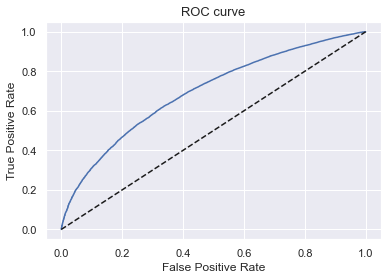

In [108]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [109]:
#checking area under the roc curvre
roc_auc = metrics.roc_auc_score(targets.good_bad, targets.prob_of_non_default)
roc_auc

0.6954297173832278

In [111]:
thresholds.shape

(17310,)

In [113]:
#concatenate fpr, tpr and thresholds in a single dataframe
df_cutoffs = pd.DataFrame(data = thresholds, columns = ['Thresholds'])
df_cutoffs.shape

(17310, 1)

In [114]:
df_cutoffs['FPR'] = fpr
df_cutoffs['TPR'] = tpr
df_cutoffs.head()

,Thresholds,FPR,TPR
0,1.993850,0.000000,0.000000
1,0.993850,0.000000,0.000012
2,0.986872,0.000000,0.004646
3,0.986858,0.000098,0.004646
4,0.986675,0.000098,0.005079


In [116]:
df_cutoffs['Thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [118]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['Thresholds'] / (1 - df_cutoffs['Thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [119]:
df_cutoffs.head()

,Thresholds,FPR,TPR,Score
0,1.000000,0.000000,0.000000,2052.0
1,0.993850,0.000000,0.000012,816.0
2,0.986872,0.000000,0.004646,758.0
3,0.986858,0.000098,0.004646,758.0
4,0.986675,0.000098,0.005079,757.0


In [120]:
#setting the first score as max score
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,Thresholds,FPR,TPR,Score
0,1.000000,0.000000,0.000000,850.0
1,0.993850,0.000000,0.000012,816.0
2,0.986872,0.000000,0.004646,758.0
3,0.986858,0.000098,0.004646,758.0
4,0.986675,0.000098,0.005079,757.0


In [121]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(targets['prob_of_non_default'] >= p, 1, 0).sum()

In [122]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Approved'] = df_cutoffs['Thresholds'].apply(n_approved)

# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['N Rejected'] = targets['prob_of_non_default'].shape[0] - df_cutoffs['N Approved']

# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / targets['prob_of_non_default'].shape[0]

# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [125]:
df_cutoffs.tail()

,Thresholds,FPR,TPR,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17305,0.470721,0.999705,0.999976,421.0,93252,5,0.999946,0.000054
17306,0.463899,0.999803,0.999976,419.0,93253,4,0.999957,0.000043
17307,0.456423,0.999803,0.999988,417.0,93254,3,0.999968,0.000032
17308,0.416559,1.000000,0.999988,404.0,93256,1,0.999989,0.000011
17309,0.339778,1.000000,1.000000,380.0,93257,0,1.000000,0.000000


In [127]:
#saving our scorecard to a csv file
scorecard.to_csv('PD scorecard.csv')

In [128]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')